<a href="https://colab.research.google.com/github/andreyppsc/tensorflow-notebooks/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in tensor flow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable base on some other combination of variables... predicting a number

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating some data to view and fit

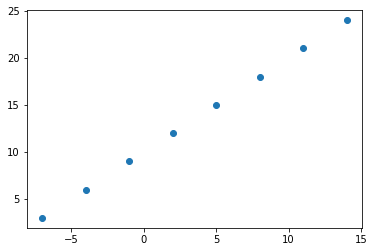

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Vizualize
plt.scatter(X, y)

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [7]:
# Create a demo tensor for our housing price prediction demo
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
X[1], y[1]

(-4.0, 6.0)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [14]:
X[0].ndim

0

In [15]:
X[0], y[0]

(-7.0, 3.0)

In [24]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), tf.float32)
y = tf.cast(tf.constant(y), tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

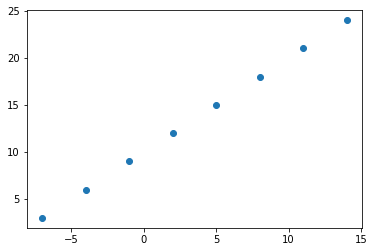

In [26]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model
2. **Compile a model** - define the loss function (the function which tells our model how wrong it is) and the optmizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can you to interpret the performance of our model)
3. **Fitting the model** - letting the model try to find patterns between X and y

In [29]:
# Set random seet
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 256ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [30]:
# Check our X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [32]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [33]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create our model
1. **Creating** a model - here we might add more layers, increase the number of hidden units (neurons) within each layer, change the activation function of each layer
2. **Compiling** a model - here we might change the optimization function or perhaps the **learning** rate of the opt. function
3. **Fitting** a model - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give more examples to learn from)